### Module 2. HW №3

Построение и визуализация 3D-цилиндра

Напишите программу для построения и визуализации 3D-цилиндра с помощью библиотеки matplotlib.

Шаги выполнения задания:

1.	Сформируйте вершины для построения цилиндра из 20 угловых секторов. Сначала постройте вершины одного основания (круга) — используйте углы поворота и радиус окружности равный 1.

Координаты вершин основания определяются по формуле:

0,cos(2*pi*(i)/N),sin(2*pi*(i)/N),

где выражение (2*pi*(i)/N) задает углы поворота на каждом шаге i.

2.	Аналогично постройте вершины второго основания, взяв высоту равную 1. Координаты вершин основания можно найти по формуле:

1,cos(2*pi*(i)/N),sin(2*pi*(i)/N)

3.	Используйте библиотеку spatial, чтобы сформировать грани для построения цилиндра из 20 угловых секторов. 

4.	Создайте сетку для построения цилиндра. 

5.	Визуализируйте полученный цилиндр.

6.	Сохраните изображение в формате stl.

Как должно получиться:<br>
<img src='../static/img/data_visual_25.png'>

In [44]:
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from scipy import spatial
from stl import mesh

In [45]:
# Функция отображения вершин
def plot_verticles(vertices, isosurf=False, filename=None):
    # создание новой графики
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    x = [v[0] for v in vertices]
    y = [v[1] for v in vertices]
    z = [v[2] for v in vertices]
    if isosurf:
        ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)
    else:
        ax.scatter(x, y, z, c="r", marker="o")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    # Отображение файла или запись файла
    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)


# Функция отображения сетки
def plot_mesh(your_mesh, size_x=10, size_y=10, dpi=80, filename=None):
    # Создание нового 3D отображения
    figure = plt.figure(figsize=(size_x, size_y), dpi=dpi)
    # axes = mplot3d.Axes3D(figure, auto_add_to_figure=False)
    axes = mplot3d.Axes3D(figure)
    axes.add_collection3d(
        mplot3d.art3d.Poly3DCollection(your_mesh.vectors, edgecolor="black")
    )
    figure.add_axes(axes)
    # Auto scale к размеру сетки
    scale = your_mesh.points.flatten()
    axes.auto_scale_xyz(scale, scale, scale)
    # Отображение и запись графика
    if filename is None:
        plt.show()
    else:
        # matplotlib.use('Agg')
        plt.savefig(filename)

In [49]:
# 0,cos(2*pi*(i)/N),sin(2*pi*(i)/N)
def create_circle(x, N=20):
    vertices_ = np.empty([0, 3])
    for i in range(N):
        y = np.cos(2 * np.pi * (i) / N)
        z = np.sin(2 * np.pi * (i) / N)
        vertices_ = np.append(vertices_, [[x, y, z]], axis=0)

    return vertices_

In [66]:
vertices_1 = create_circle(0, N=20)
# vertices = np.append(vertices, create_circle(1, N=20))
# vertices

In [68]:
vertices_2 = create_circle(1, N=20)
vertices = np.append(vertices_1, vertices_2, axis=0)

In [69]:
hull = spatial.ConvexHull(vertices)
faces = hull.simplices  # Массив faces содержит описание граней
faces

array([[39, 19,  0],
       [39, 20,  0],
       [38, 19, 18],
       [38, 39, 19],
       [35, 16, 15],
       [35, 16, 36],
       [14, 35, 34],
       [14, 35, 15],
       [31, 11, 12],
       [31, 12, 32],
       [21,  1,  0],
       [21, 20,  0],
       [37, 16, 17],
       [37, 16, 36],
       [37, 17, 18],
       [37, 38, 18],
       [30,  9, 10],
       [30,  9, 29],
       [30, 11, 10],
       [30, 31, 11],
       [26,  6,  7],
       [26,  7, 27],
       [26,  6,  5],
       [26, 25,  5],
       [24,  3,  4],
       [24,  3, 23],
       [24,  4,  5],
       [24, 25,  5],
       [22, 35, 36],
       [22, 37, 36],
       [22, 39, 20],
       [22, 30, 29],
       [22, 21, 20],
       [22, 33, 32],
       [22, 31, 32],
       [22, 38, 39],
       [22, 35, 34],
       [22, 28, 27],
       [22, 26, 27],
       [22, 24, 23],
       [22, 37, 38],
       [22, 33, 34],
       [22, 28, 29],
       [22, 30, 31],
       [22, 26, 25],
       [22, 24, 25],
       [22,  3,  2],
       [22,  

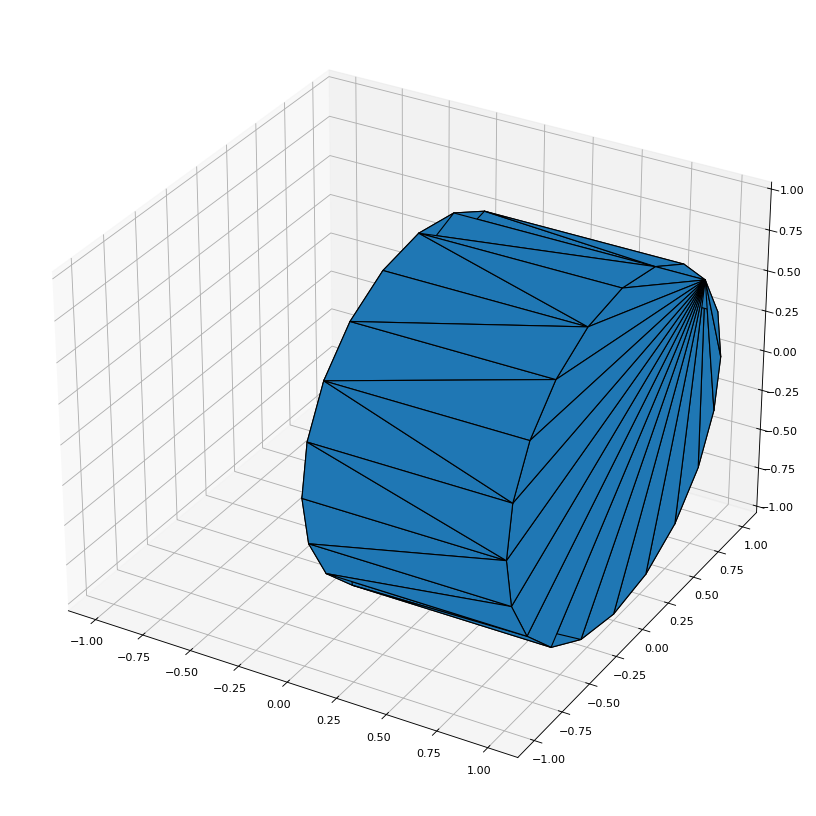

In [70]:
# Создание сетки
cylinder_mesh = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        cylinder_mesh.vectors[i][j] = vertices[f[j], :]
plot_mesh(cylinder_mesh)

# Запись сетки в файл "cylinder_mesh.stl"
cylinder_mesh.save("cylinder_mesh.stl")